# About Dataset

Features:
fraud_bool (boolean) = (1 if fraud, 0 if legit).

income (numeric) = Annual income of the applicant in quantiles. Ranges between [0, 1].

name_email_similarity (numeric) = Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges

prev_address_months_count (numeric) = Number of months in previous registered address of the applicant, i.e. the applicant’s previous residence, if applicable. Ranges between [-1, 380] months (-1 is a missing value).

current_address_months_count (numeric) = Months in currently registered address of the applicant. Ranges between [-1, 429] months (-1 is a missing value).

customer_age (numeric) = Applicant’s age in bins per decade (e.g, 20-29 is represented as 20). Ranges between [10, 90] years.

days_since_request (numeric): Number of days passed since application was done. Ranges between [0, 79] days.

intended_balcon_amount (numeric): Initial transferred amount for application. Ranges between [–16, 114] (negatives are missing values).

payment_type (categorical): Credit payment plan type. 5 possible (anonymized) values.

zip_count_4w (numeric): Number of applications within same zip code in last 4 weeks. Ranges between [1, 6830].

velocity_6h (numeric): Velocity of total applications made in last 6 hours i.e., average number of applications per hour in the last 6 hours. Ranges between [–175, 16818].

velocity_24h (numeric): Velocity of total applications made in last 24 hours i.e., average number of applications per hour in the last 24 hours. Ranges between [1297, 9586].

velocity_4w (numeric): Velocity of total applications made in last 4 weeks i.e., average number of applications per hour in the last 4 weeks. Ranges between [2825, 7020].

bank_branch_count_8w (numeric): Number of total applications in the selected bank branch in last 8 weeks. Ranges between [0, 2404].

date_of_birth_distinct_emails_4w (numeric): Number of emails for applicants with same date of birth in last 4 weeks. Ranges between [0, 39].

employment_status (categorical): Employment status of the applicant. 7 possible (anonymized) values.

credit_risk_score (numeric): Internal score of application risk. Ranges between [–191, 389].

email_is_free (binary): Domain of application email (either free or paid).

housing_status (categorical): Current residential status for applicant. 7 possible (anonymized) values.

phone_home_valid (binary): Validity of provided home phone.

phone_mobile_valid (binary): Validity of provided mobile phone.

bank_months_count (numeric): How old is previous account (if held) in months. Ranges between [–1, 32] months (–1 is a missing value).

has_other_cards (binary): If applicant has other cards from the same banking company.

proposed_credit_limit (numeric): Applicant’s proposed credit limit. Ranges between [200, 2000].

foreign_request (binary): If origin country of request is different from bank’s country.

source (categorical): Online source of application. Either browser (INTERNET) or app (TELEAPP).

session_length_in_minutes (numeric): Length of user session in banking website in minutes. Ranges between [–1, 107] minutes (–1 is a missing value).

device_os (categorical): Operative system of device that made request. Possible values are: Windows, macOS, Linux, X11, or other.

keep_alive_session (binary): User option on session logout.

device_distinct_emails (numeric): Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [–1, 2] emails (–1 is a missing value).

device_fraud_count (numeric): Number of fraudulent applications with used device. Ranges between [0, 1].

month (numeric): Month where the application was made. Ranges between [0, 7].

Link dataset: https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load Dataset

In [9]:
data = pd.read_csv("/kaggle/input/bank-account-fraud-dataset-neurips-2022/Base.csv")
data

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,...,0,1500.0,0,INTERNET,16.967770,other,0,1,0,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,...,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,...,0,200.0,0,INTERNET,16.068595,other,0,1,0,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,...,0,200.0,0,INTERNET,1.378683,linux,1,1,0,7


# Data Understanding

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [ ]:
data = data.head(2_00_000)
data

In [ ]:
data.describe()

In [2]:
plot = data["fraud_bool"].value_counts()
ax = plot.plot.bar(figsize=(15, 5))
ax.set_title("Jumlah Data Penipuan 0 (Tidak) 1 (Ya)")

for container in ax.containers:
    ax.bar_label(container)

NameError: name 'data' is not defined

In [3]:
plot = data["email_is_free"].value_counts()
ax = plot.plot.bar(figsize=(15, 5))
ax.set_title("Jumlah Email yang Terdaftar Secara Gratis 0 (Tidak) 1 (Ya)")

for container in ax.containers:
    ax.bar_label(container)

NameError: name 'data' is not defined

In [4]:
plot = data["has_other_cards"].value_counts()
ax = plot.plot.bar(figsize=(15, 5))
ax.set_title("Jumlah Kartu yang Dimiliki Lebih Dari 1 Kartu yang Terdaftar Pada Bank yang Sama 0 (Tidak) 1 (Ya)")

for container in ax.containers:
    ax.bar_label(container)

NameError: name 'data' is not defined

In [5]:
plot = pd.pivot_table(data=data, values="fraud_bool", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah yang Terindikasi Penipuan Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

NameError: name 'pd' is not defined

In [6]:
# plot = pd.pivot_table(data=data, values="fraud_bool", columns="customer_age", aggfunc="sum")
# ax = plot.plot.barh(figsize=(15, 8))
# ax.set_title("Jumlah yang Terindikasi Penipuan Berdasarkan Kelompok Umur Kustomer")
# ax.legend(loc="upper right")

# for container in ax.containers:
#     ax.bar_label(container)
# email_is_free

In [7]:
# Mengurutkan berdasarkan fitur fraud_bool 1
plot = data.groupby(["employment_status", "fraud_bool"])["customer_age"].sum().unstack().sort_values(by=1, ascending=True)
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Umur Kustomer Berdasarkan Status Pekerjaan dan yang Terindikasi Penipuan")
ax.legend(loc="center right")

for container in ax.containers:
    ax.bar_label(container)

NameError: name 'data' is not defined

In [18]:
categorical_features = data.select_dtypes(include=['object', 'category']).columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

In [19]:
def print_counts_categories_features(data):
    for col in categorical_features:
        plt.figure(figsize=(8, 5))
        counts = data[col].value_counts(dropna=False)
        counts.plot(kind='bar')
        plt.title(f'Distribusi Kategori: {col}')
        plt.xlabel(col)
        plt.ylabel('Jumlah')
        plt.xticks(rotation=45, ha='right')
        
        for i, count in enumerate(counts):
            plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=9)
            
        plt.tight_layout()
        plt.show()

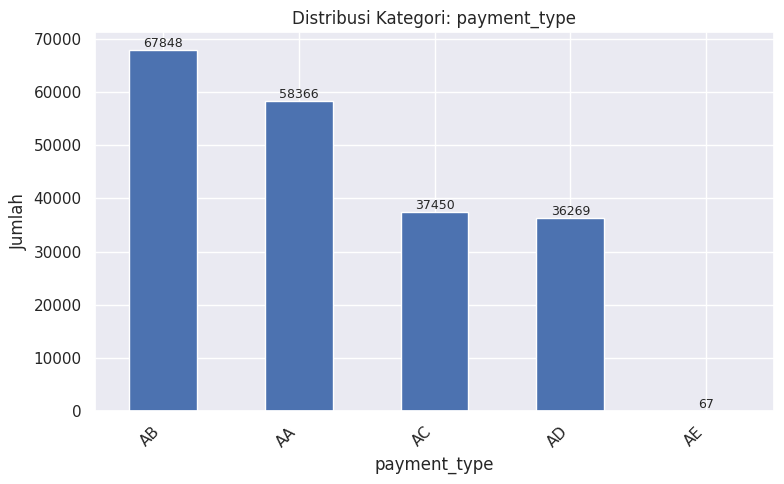

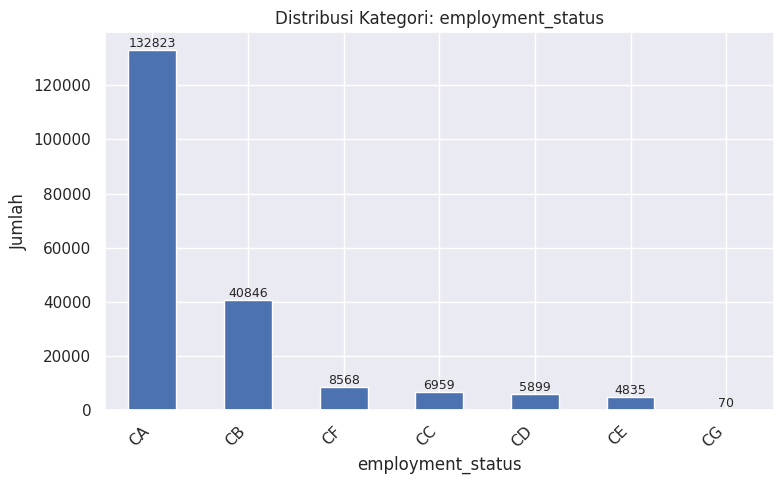

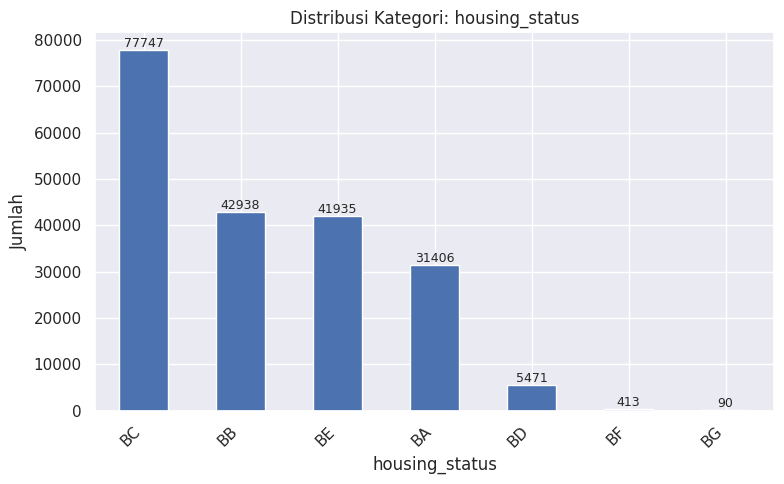

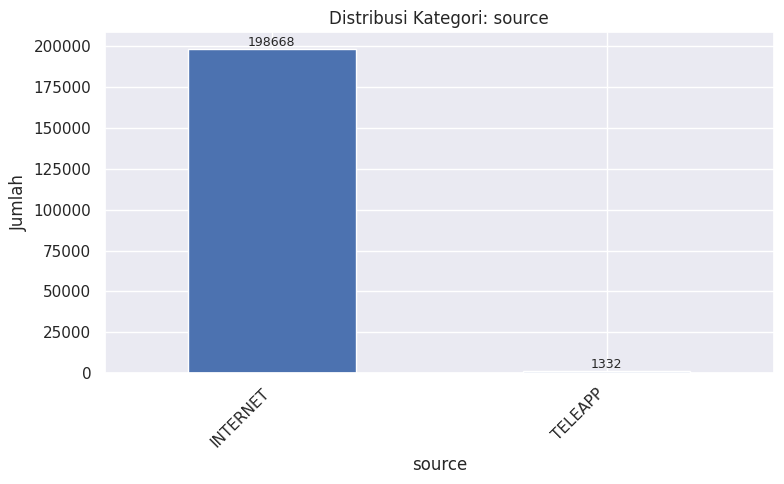

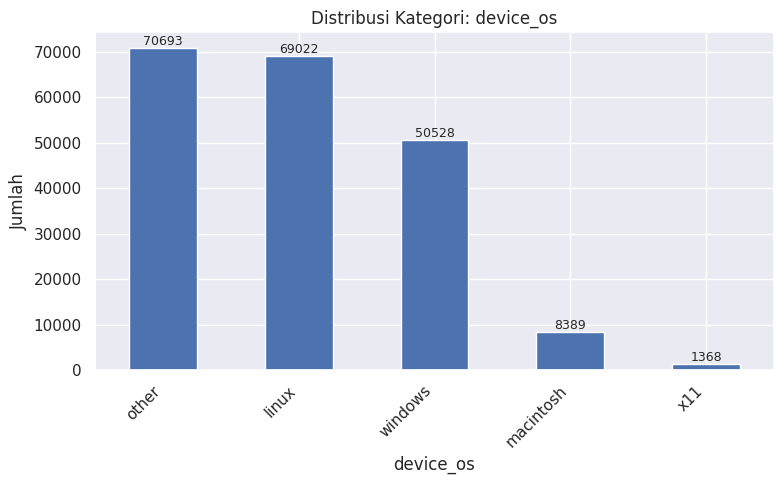

In [20]:
print_counts_categories_features(data)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

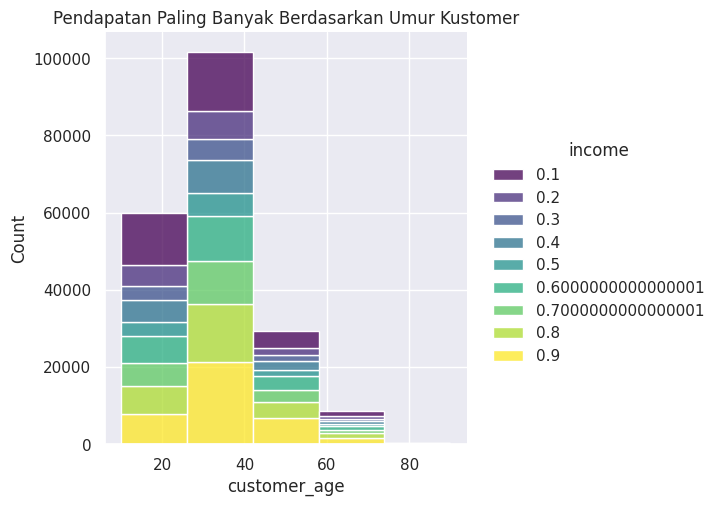

In [21]:
sns.displot(
    data=data, 
    bins=5, 
    x="customer_age", 
    hue="income", 
    multiple="stack", 
    palette="viridis").set(title="Pendapatan Paling Banyak Berdasarkan Umur Kustomer");

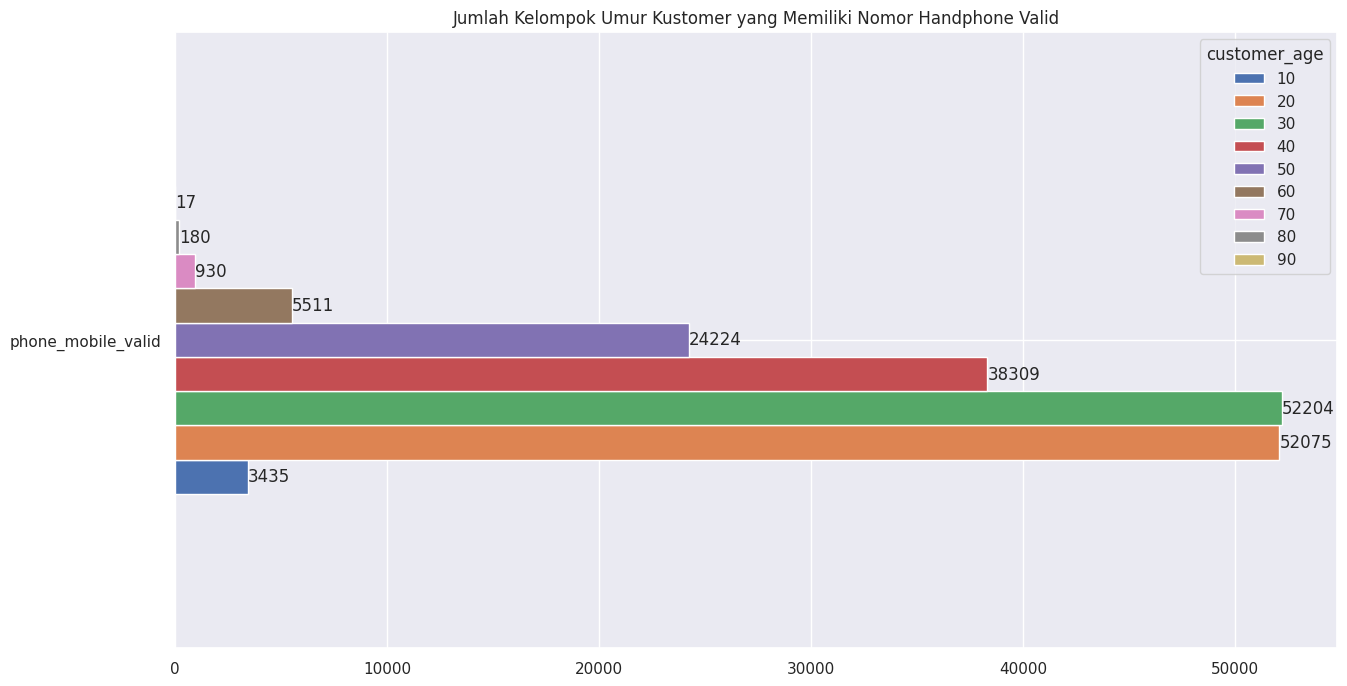

In [22]:
plot = pd.pivot_table(data=data, values="phone_mobile_valid", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Kelompok Umur Kustomer yang Memiliki Nomor Handphone Valid")

for container in ax.containers:
    ax.bar_label(container)

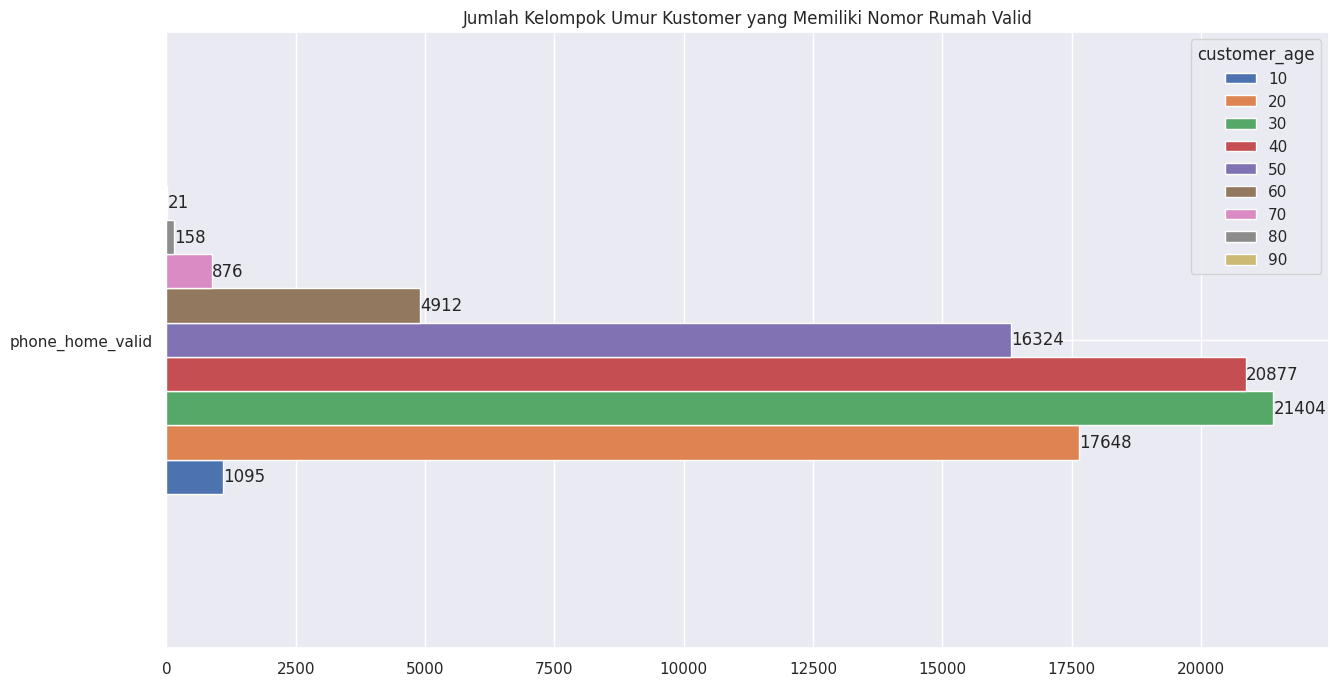

In [23]:
plot = pd.pivot_table(data=data, values="phone_home_valid", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Kelompok Umur Kustomer yang Memiliki Nomor Rumah Valid")

for container in ax.containers:
    ax.bar_label(container)

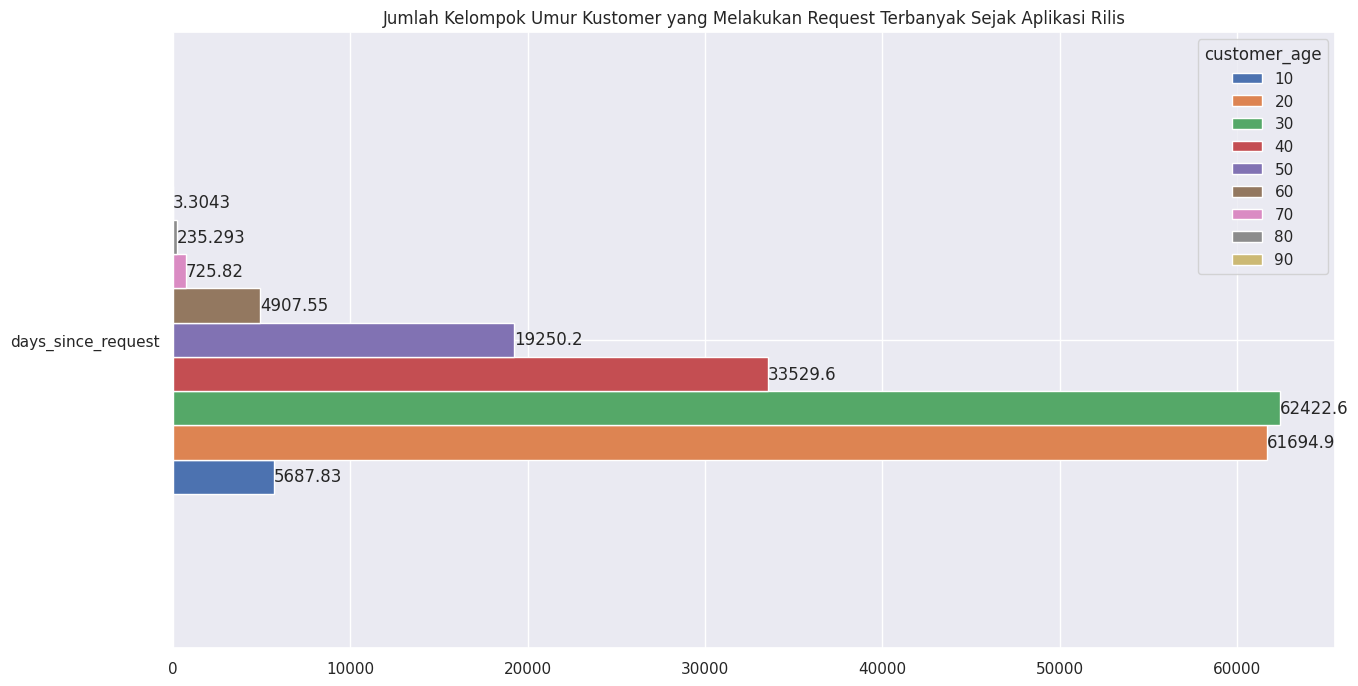

In [24]:
plot = pd.pivot_table(data=data, values="days_since_request", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Kelompok Umur Kustomer yang Melakukan Request Terbanyak Sejak Aplikasi Rilis")

for container in ax.containers:
    ax.bar_label(container)

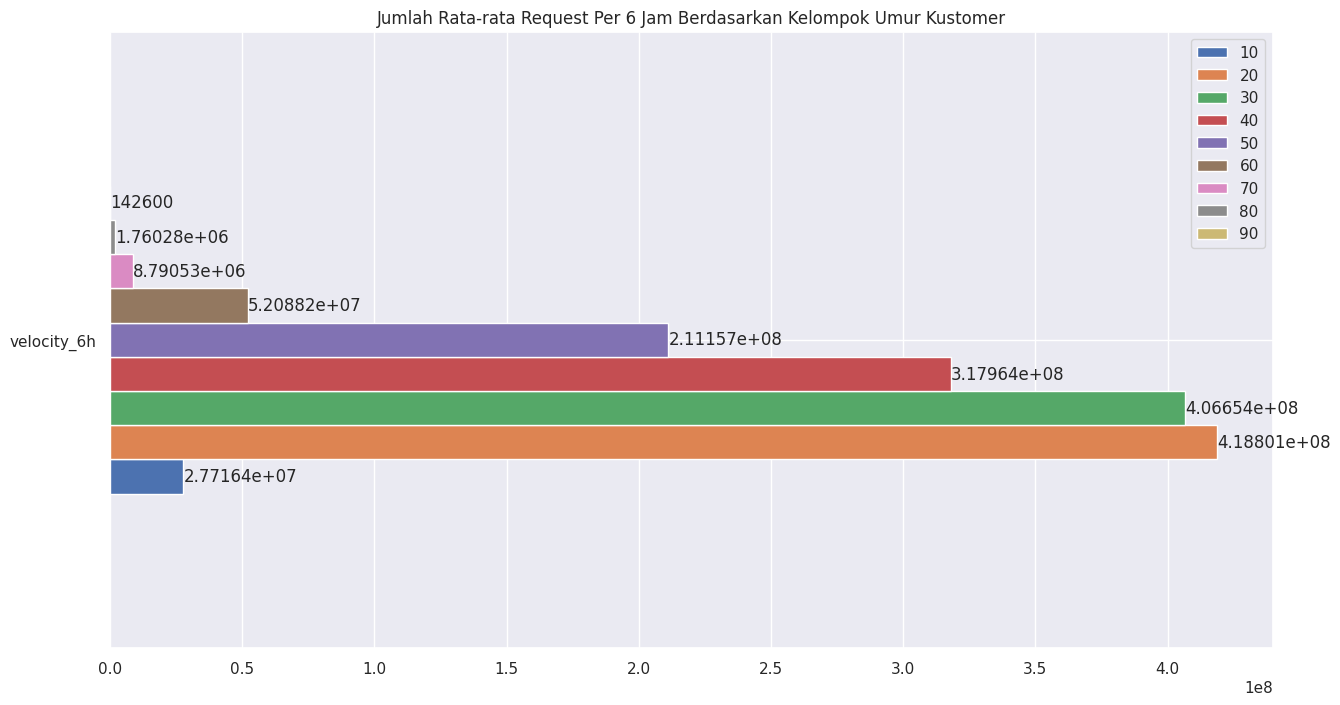

In [25]:
plot = pd.pivot_table(data=data, values="velocity_6h", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Rata-rata Request Per 6 Jam Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

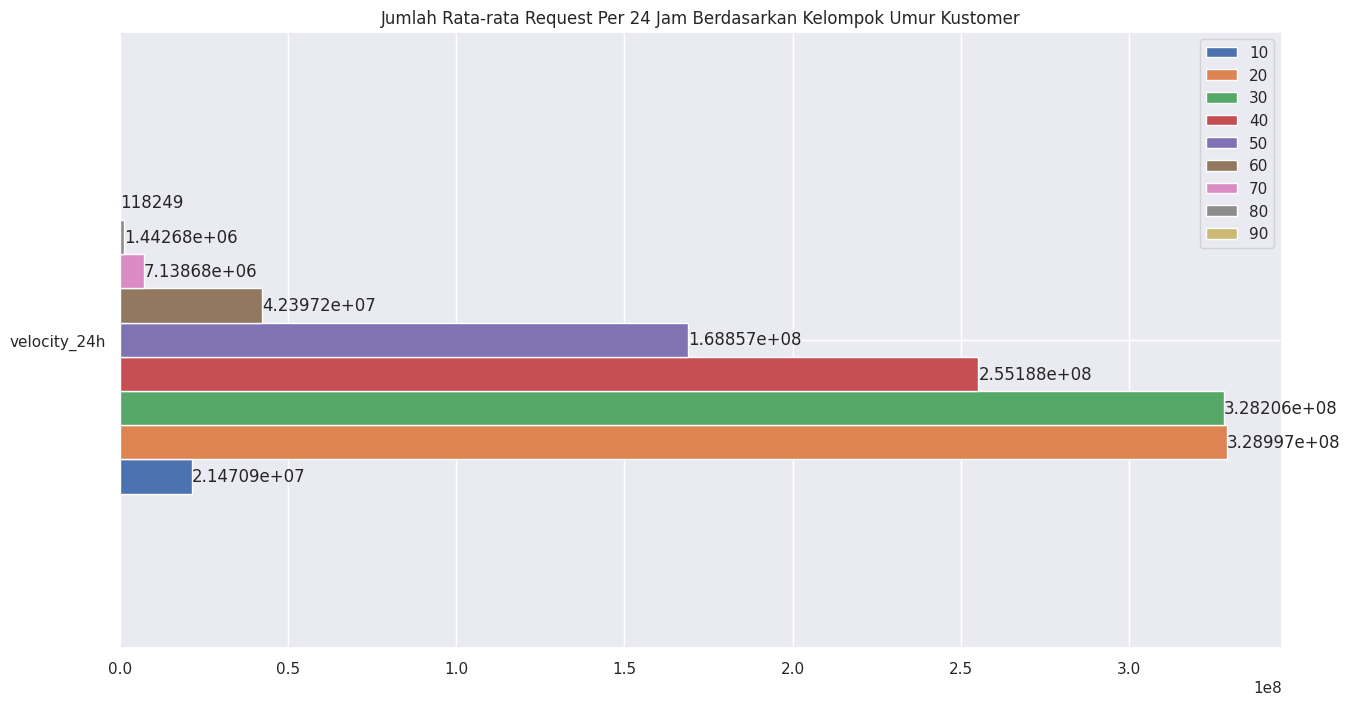

In [26]:
plot = pd.pivot_table(data=data, values="velocity_24h", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Rata-rata Request Per 24 Jam Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

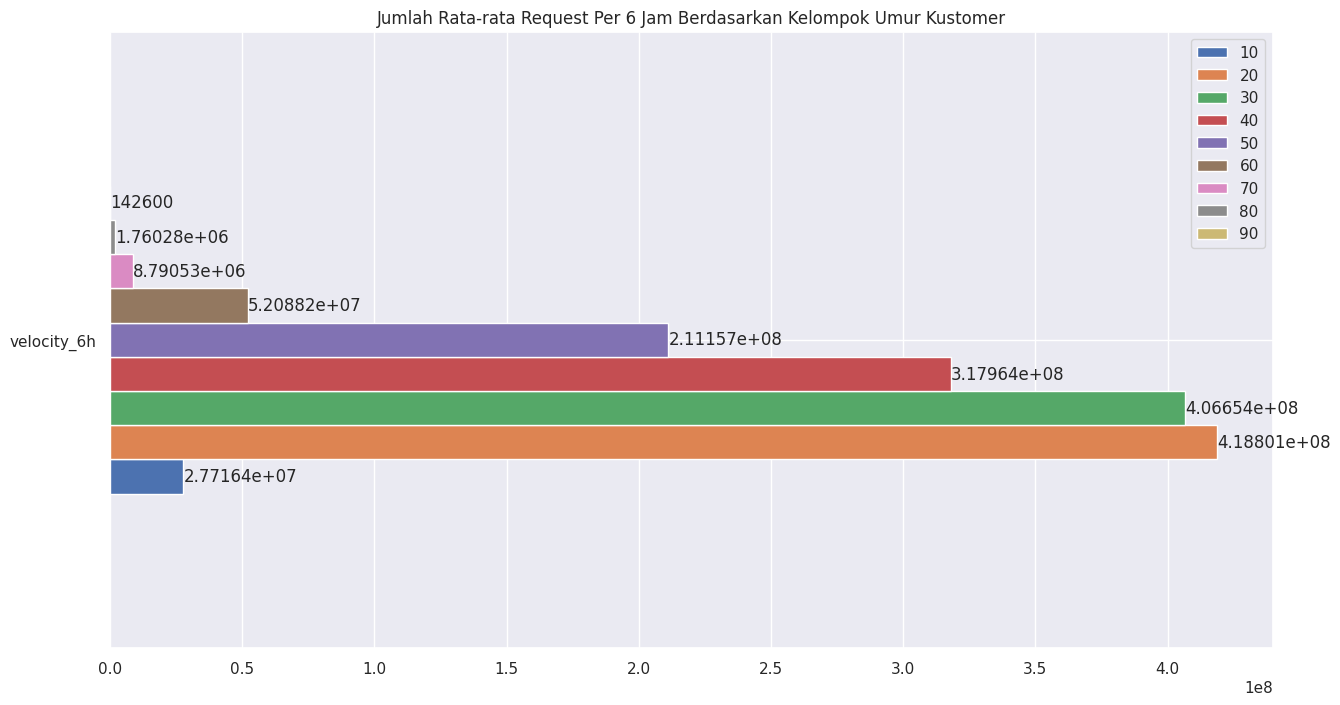

In [27]:
plot = pd.pivot_table(data=data, values="velocity_6h", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Rata-rata Request Per 6 Jam Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

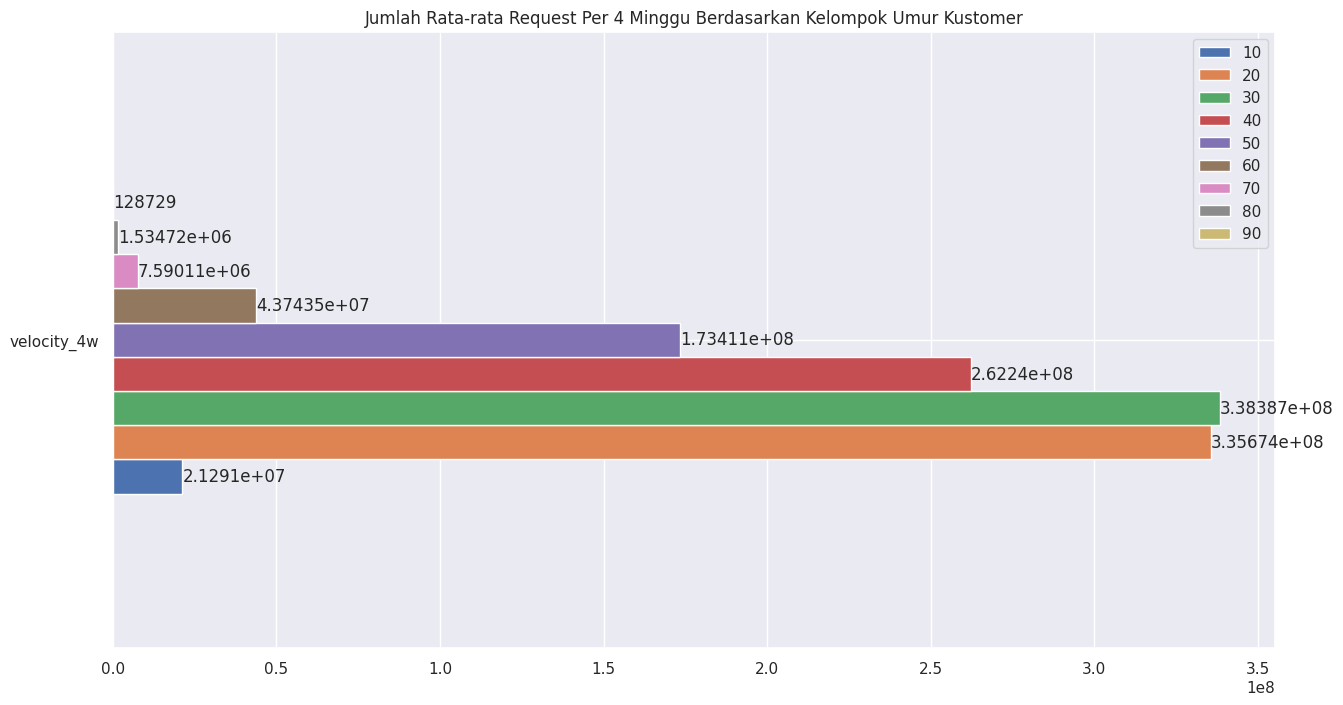

In [28]:
plot = pd.pivot_table(data=data, values="velocity_4w", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Rata-rata Request Per 4 Minggu Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

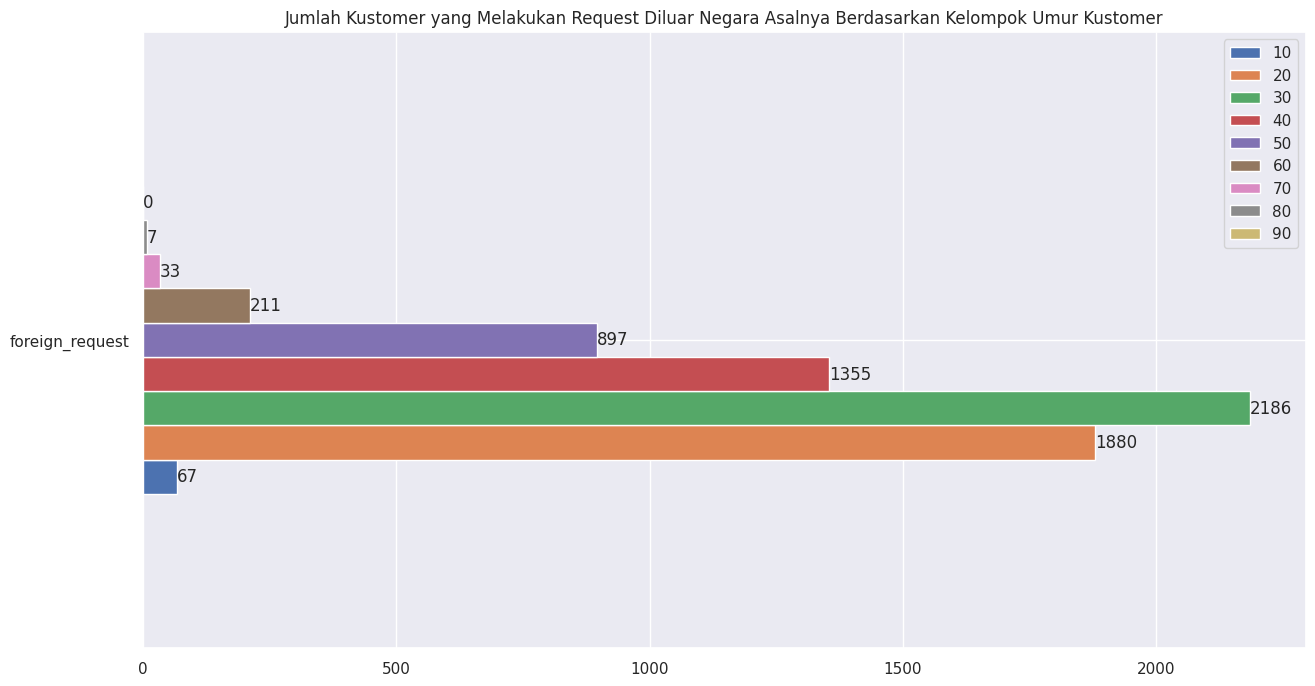

In [29]:
plot = pd.pivot_table(data=data, values="foreign_request", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Kustomer yang Melakukan Request Diluar Negara Asalnya Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


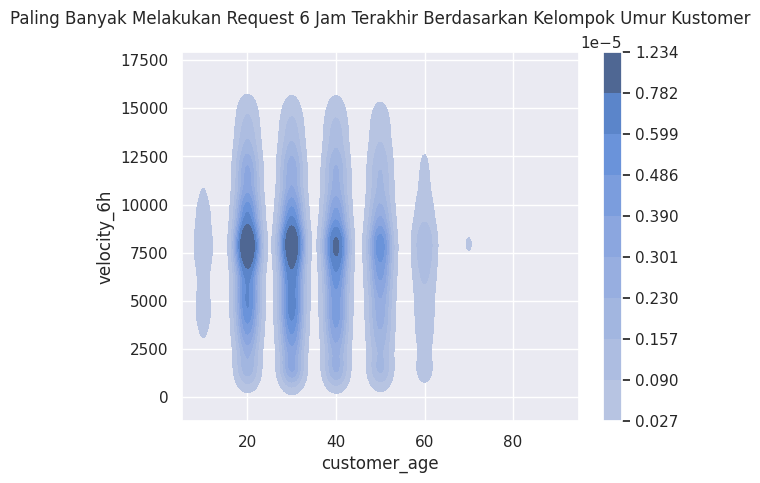

In [30]:
ax = sns.kdeplot(
    data=data,
    x="customer_age",
    y="velocity_6h",
    cbar=True,
    fill=True
)
ax.set_title(
    "Paling Banyak Melakukan Request 6 Jam Terakhir Berdasarkan Kelompok Umur Kustomer",
    pad=20  # Atur jarak
)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

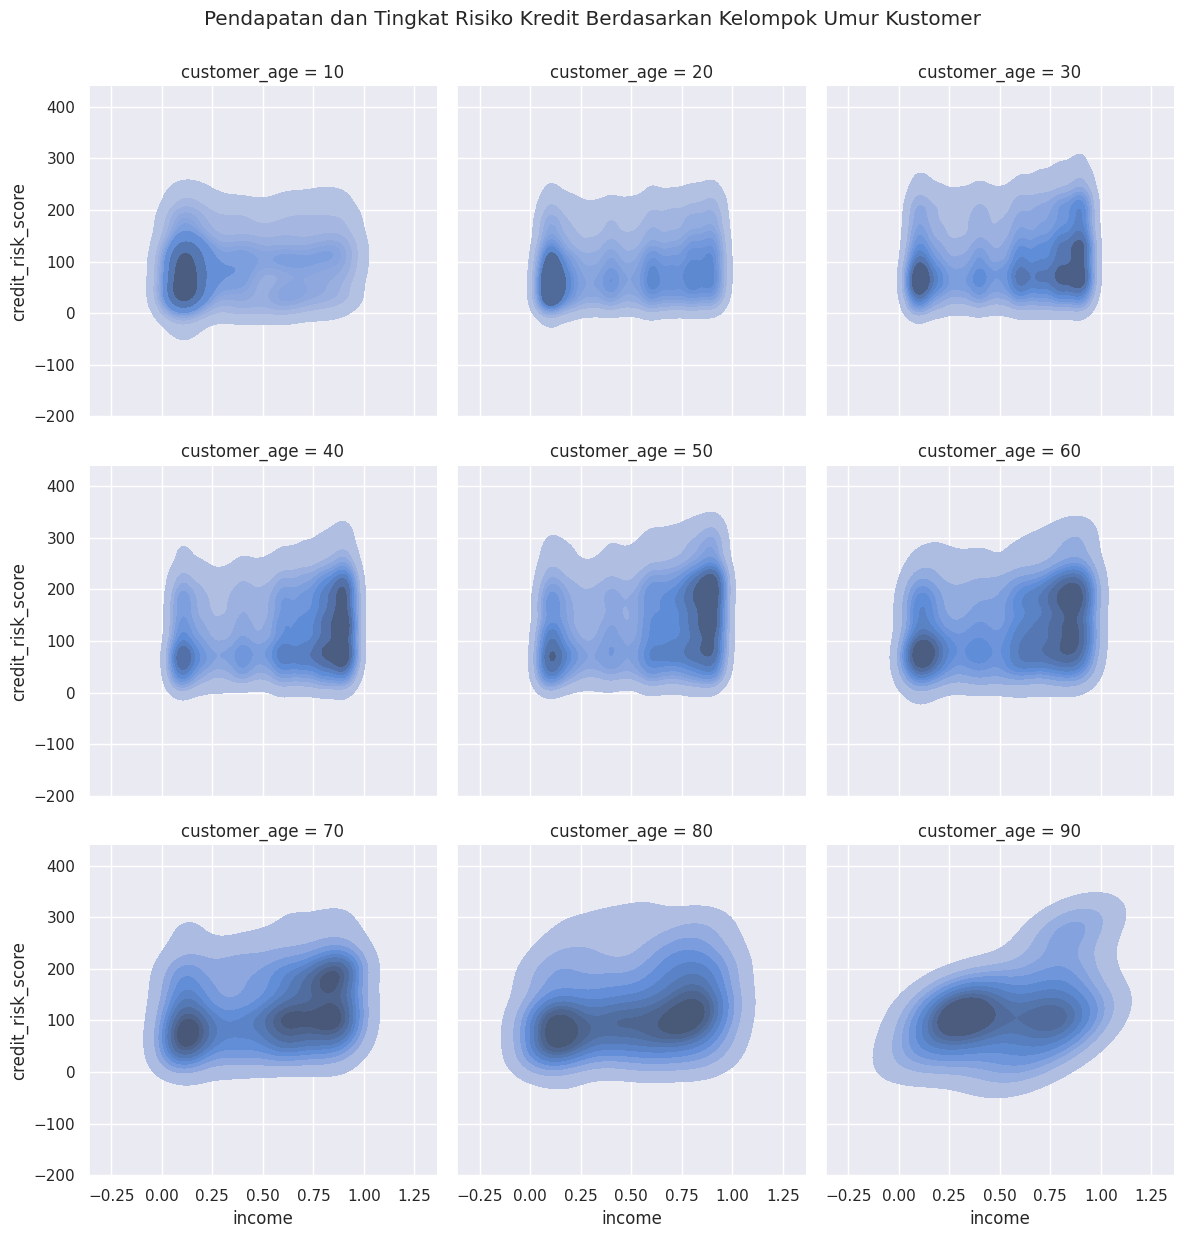

In [31]:
g = sns.FacetGrid(data, col="customer_age", height=4, col_wrap=3)
g.map(sns.kdeplot, "income", "credit_risk_score", fill=True)
g.figure.suptitle(
    "Pendapatan dan Tingkat Risiko Kredit Berdasarkan Kelompok Umur Kustomer",
    y=1.03,  # Atur posisi vertikal judul agar tidak menimpa judul subplot
);

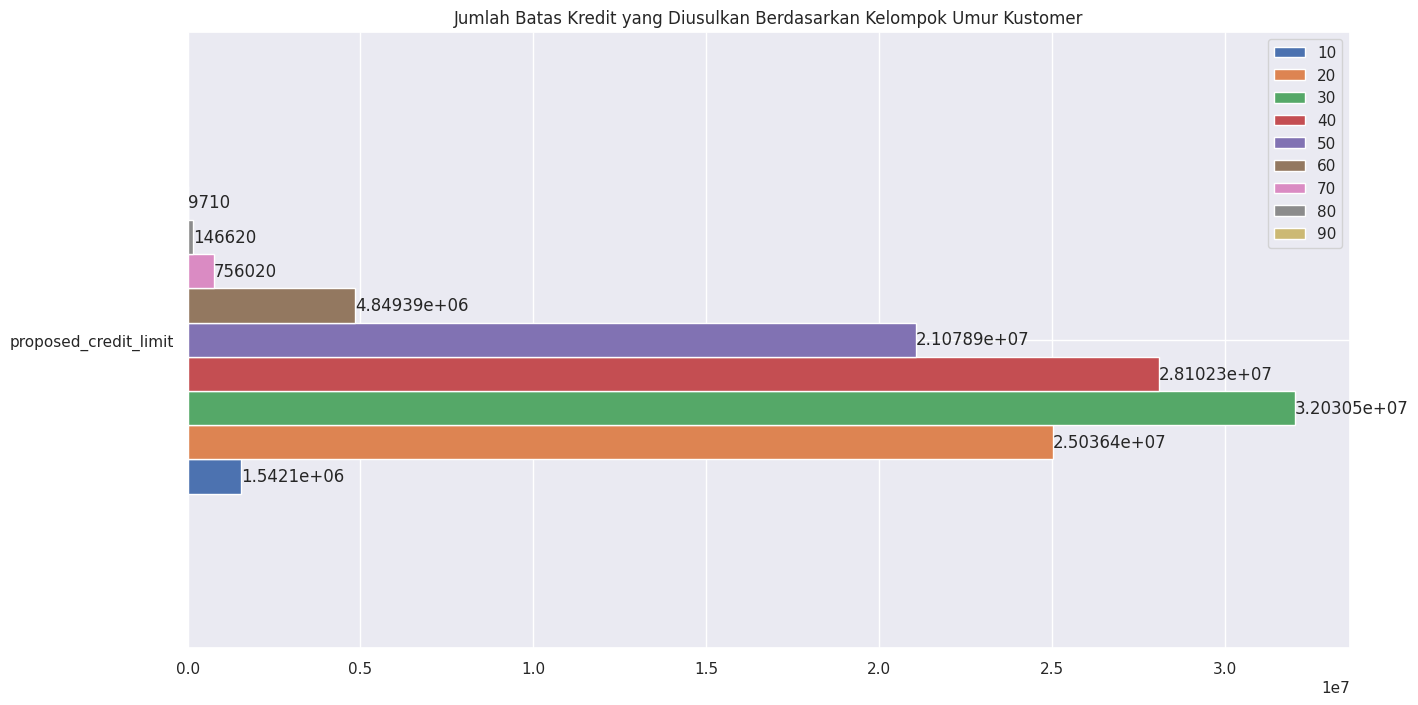

In [36]:
plot = pd.pivot_table(data=data, values="proposed_credit_limit", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Batas Kredit yang Diusulkan Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

In [62]:
pivot_table = pd.pivot_table(data=data, values="intended_balcon_amount", index="employment_status", columns="customer_age", aggfunc="sum")
pivot_table

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


customer_age,10,20,30,40,50,60,70,80,90
employment_status,,,,,,,,,
CA,184548.812050,1.628270e+06,2.225750e+06,1.401130e+06,872464.320747,144103.992730,19925.996158,3815.274492,247.115372
CB,15411.250216,2.572902e+05,4.879372e+05,3.298536e+05,195269.786871,50309.061527,13072.149625,1777.545466,189.979994
CC,620.619427,9.941561e+03,1.517108e+04,2.063235e+04,81063.723244,65907.649559,18180.996769,4836.839748,147.726687
CD,2032.800686,3.090048e+04,3.881426e+04,3.084201e+04,22191.422188,5005.826489,800.204059,194.023794,NaN
CE,22385.688633,1.482820e+05,4.849725e+04,3.657227e+04,23725.155561,5445.496379,1179.117072,181.112091,NaN
CF,1402.772545,3.250114e+04,6.596126e+04,4.919358e+04,33927.221786,6343.261919,1683.755750,360.944525,48.029130
CG,188.545562,1.012787e+03,1.431261e+03,9.155541e+02,1268.825924,348.897160,-6.288476,-0.853783,NaN


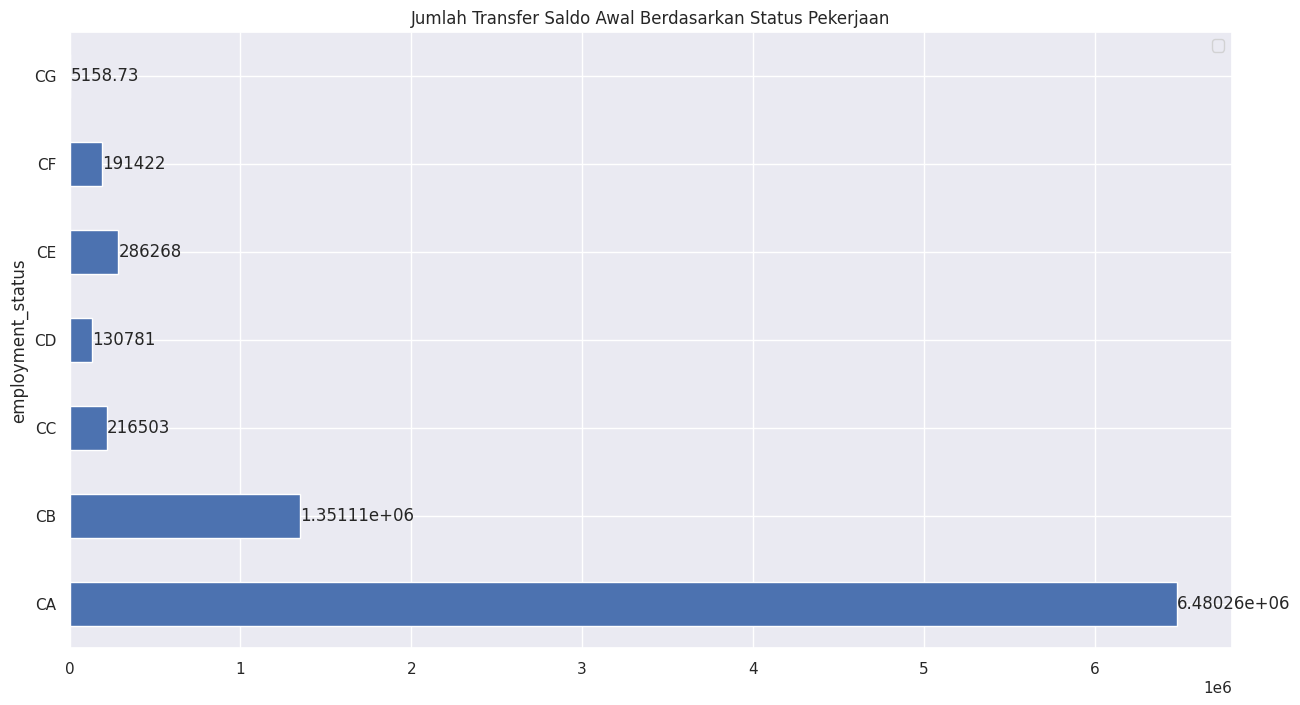

In [70]:
ax = pivot_table.sum(axis=1).plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Transfer Saldo Awal Berdasarkan Status Pekerjaan")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

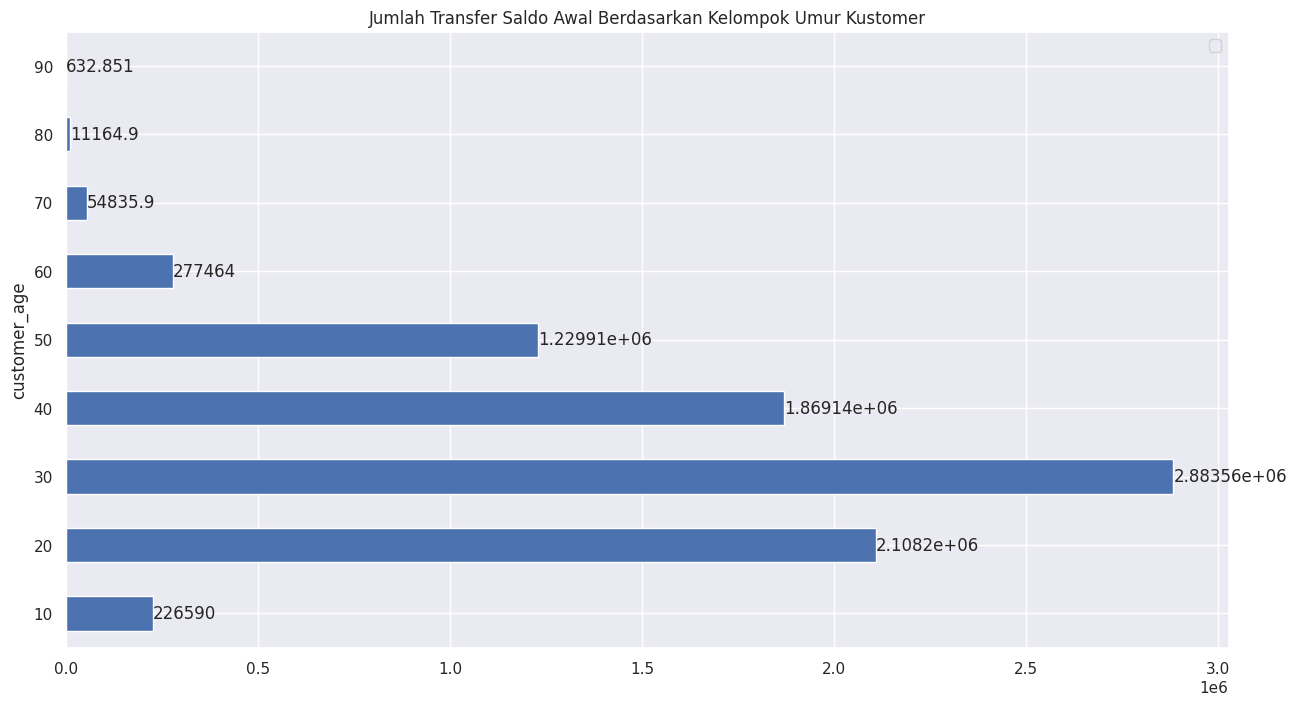

In [68]:
ax = pivot_table.sum(axis=0).plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Transfer Saldo Awal Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)